# Data cleaning and Transformation
handle missing values

# importing packages

In [18]:
import missingno as msno
import pandas as pd
import logging
import sys
import os

#sys.path.append(os.path.abspath(os.path.join("/script")))
#from utils import percent_missing,format_float, find_agg, missing_values_table,convert_bytes_to_megabytes,fix_missing_ffill,fix_missing_bfill

# extracting dataset

In [31]:
import psycopg2
from sqlalchemy import create_engine
db_credentials = {
    'user': 'postgres',
    'password': 'Nurye@68793',
    'host': 'localhost',
    'port': '5432',
    'database': 'nurye'
}

# Construct the connection string
connection_string = f"postgresql+psycopg2://{db_credentials['user']}:{db_credentials['password']}@{db_credentials['host']}:{db_credentials['port']}/{db_credentials['database']}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)
# Establish a connection
connection = psycopg2.connect(
    user=db_credentials['user'],
    password=db_credentials['password'],
    host=db_credentials['host'],
    port=db_credentials['port'],
    database=db_credentials['database']
)

# Create a cursor
cursor = connection.cursor()

# Now you can execute SQL queries using the cursor
# For example:
cursor.execute("SELECT * FROM xdr_data;")
result = cursor.fetchall()






### looking the information of the dataset
the data contains 150001 rows and 55 columns with data type of floats and objectes

In [34]:
df.info()
#df is the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [35]:
# identify thos which do not have missing values
i = 0
for key, item in df.isnull().sum().items():
    if item==0:
        i+=1
        print(key)
print('the dataset contain {} columns with no missing values'.format(i))

Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (Bytes)
Youtube UL (Bytes)
Netflix DL (Bytes)
Netflix UL (Bytes)
Gaming DL (Bytes)
Gaming UL (Bytes)
Other DL (Bytes)
Other UL (Bytes)
the dataset contain 14 columns with no missing values


In [5]:
#get those who has missing values
columns = []
counts=[]
i=0
for key, item in df.isnull().sum().items():
    if item != 0:
        columns.append(key)
        counts.append(item)
        i+=1
print('the dataset has {} columns with missing values'.format(i))
pd.DataFrame({'column name':columns,'counts':counts})

the dataset has 41 columns with missing values


,column name,counts
0,Bearer Id,991
1,Start,1
2,Start ms,1
3,End,1
4,End ms,1
5,Dur. (ms),1
6,IMSI,570
7,MSISDN/Number,1066
8,IMEI,572
9,Last Location Name,1153


<AxesSubplot:>

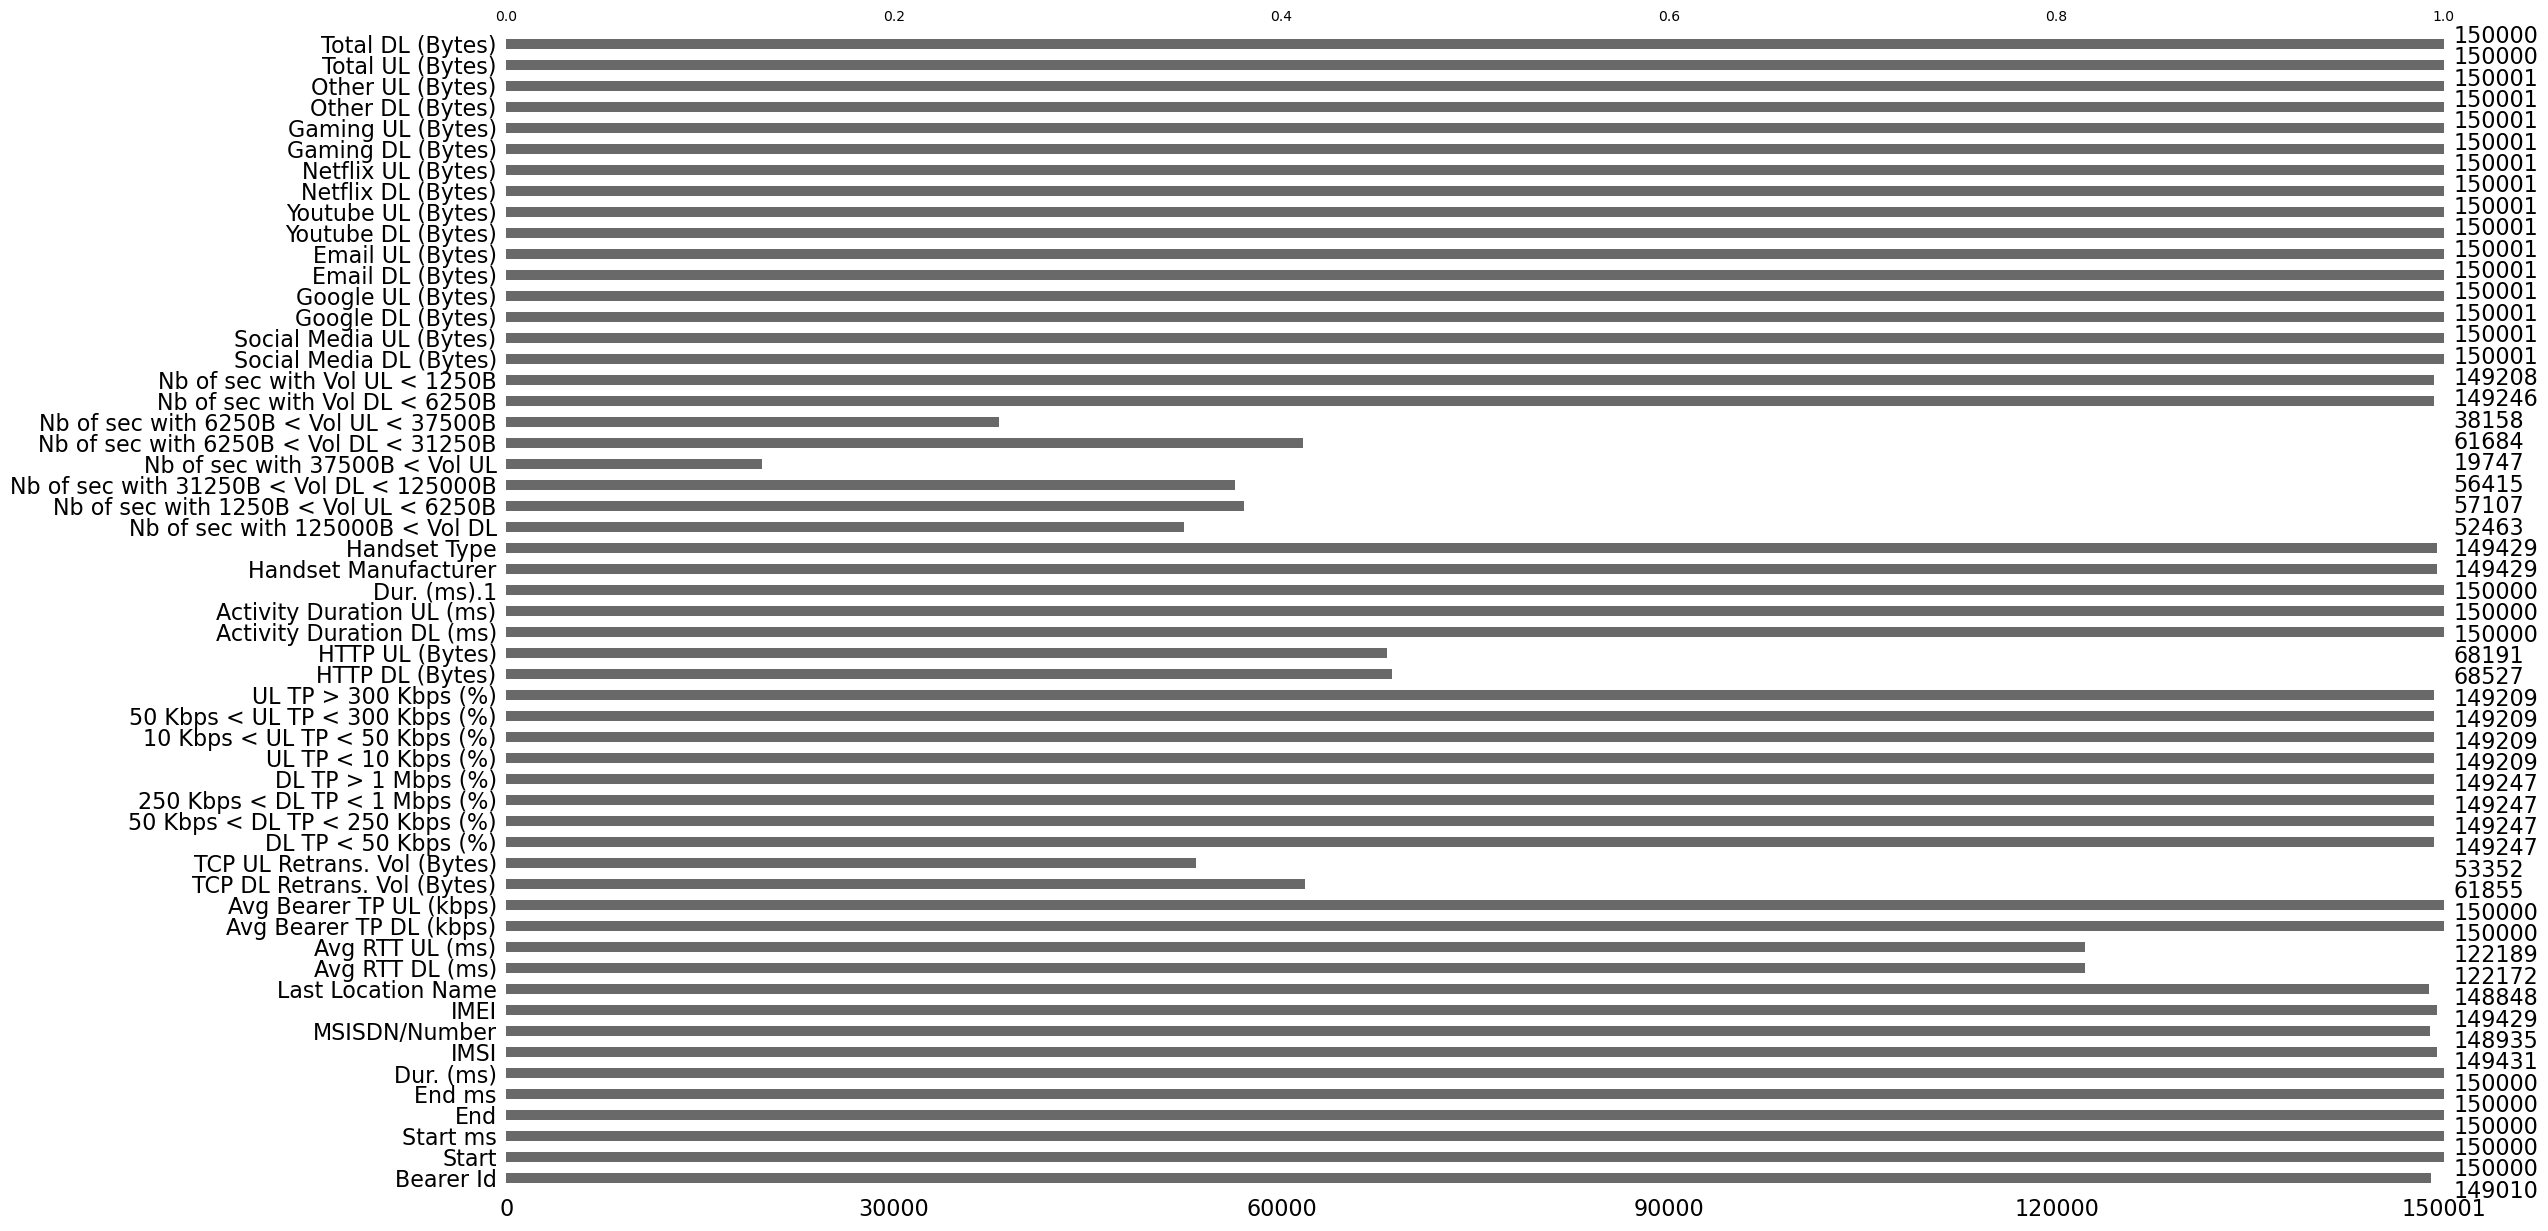

In [42]:
msno.bar(df)

<Axes: >

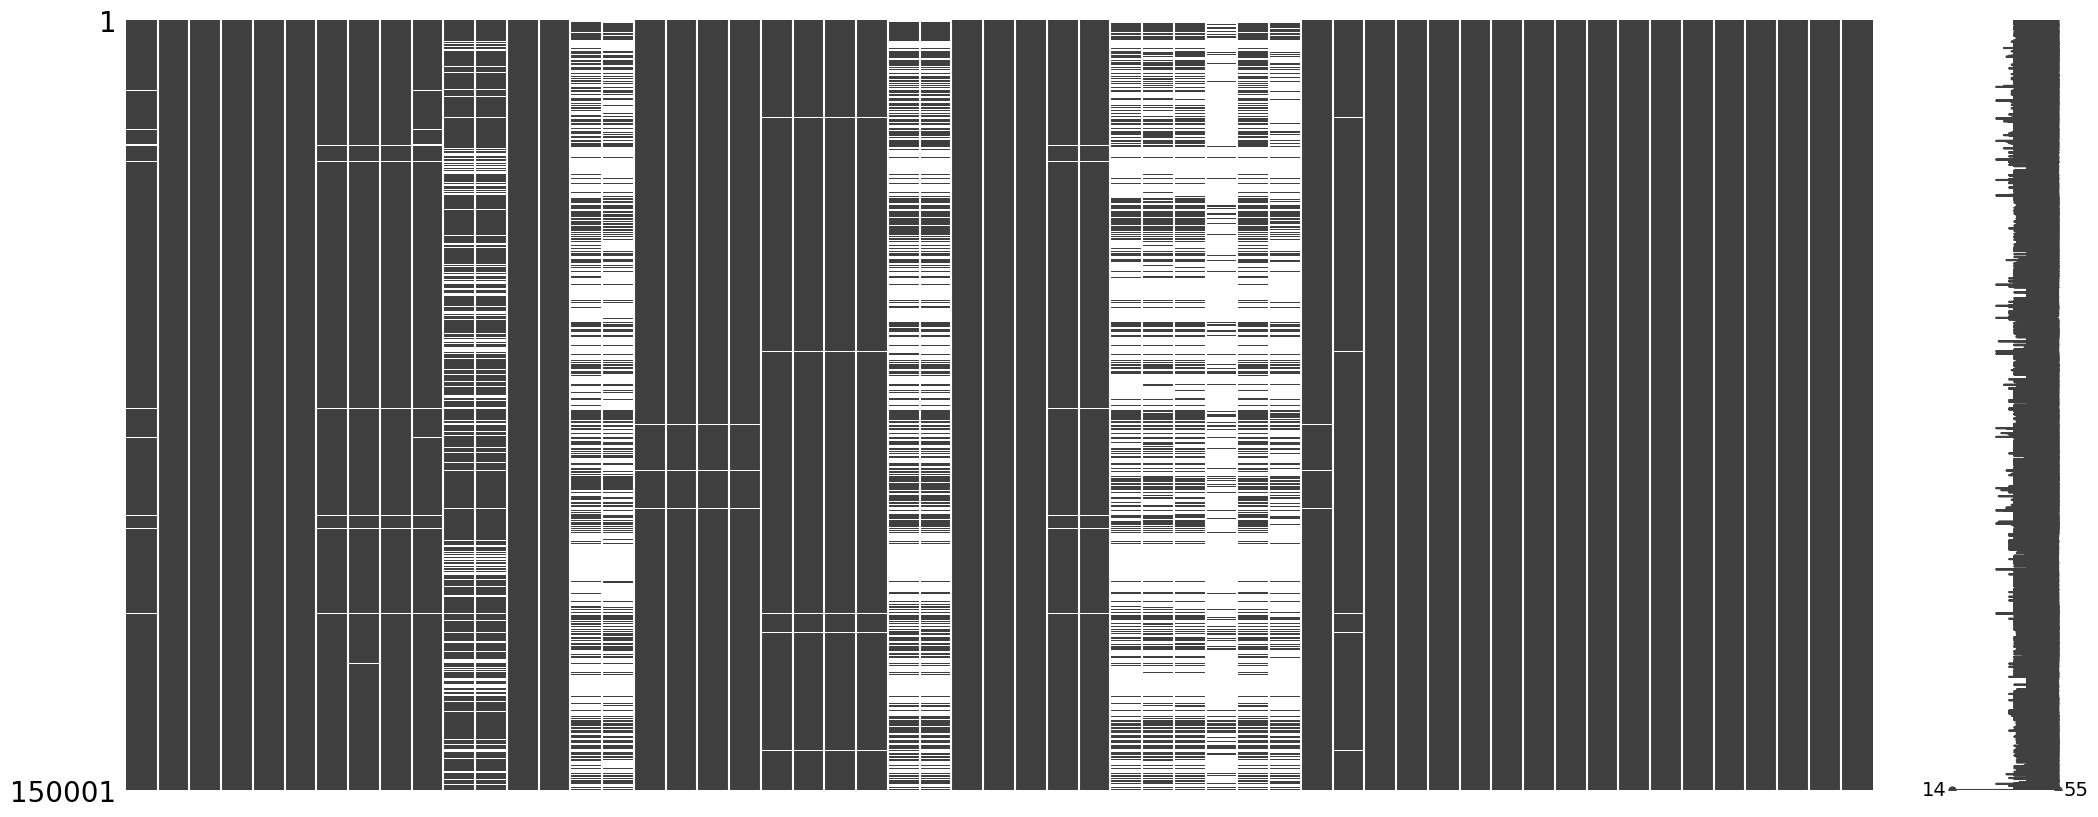

In [6]:
msno.matrix(df)


<AxesSubplot:>

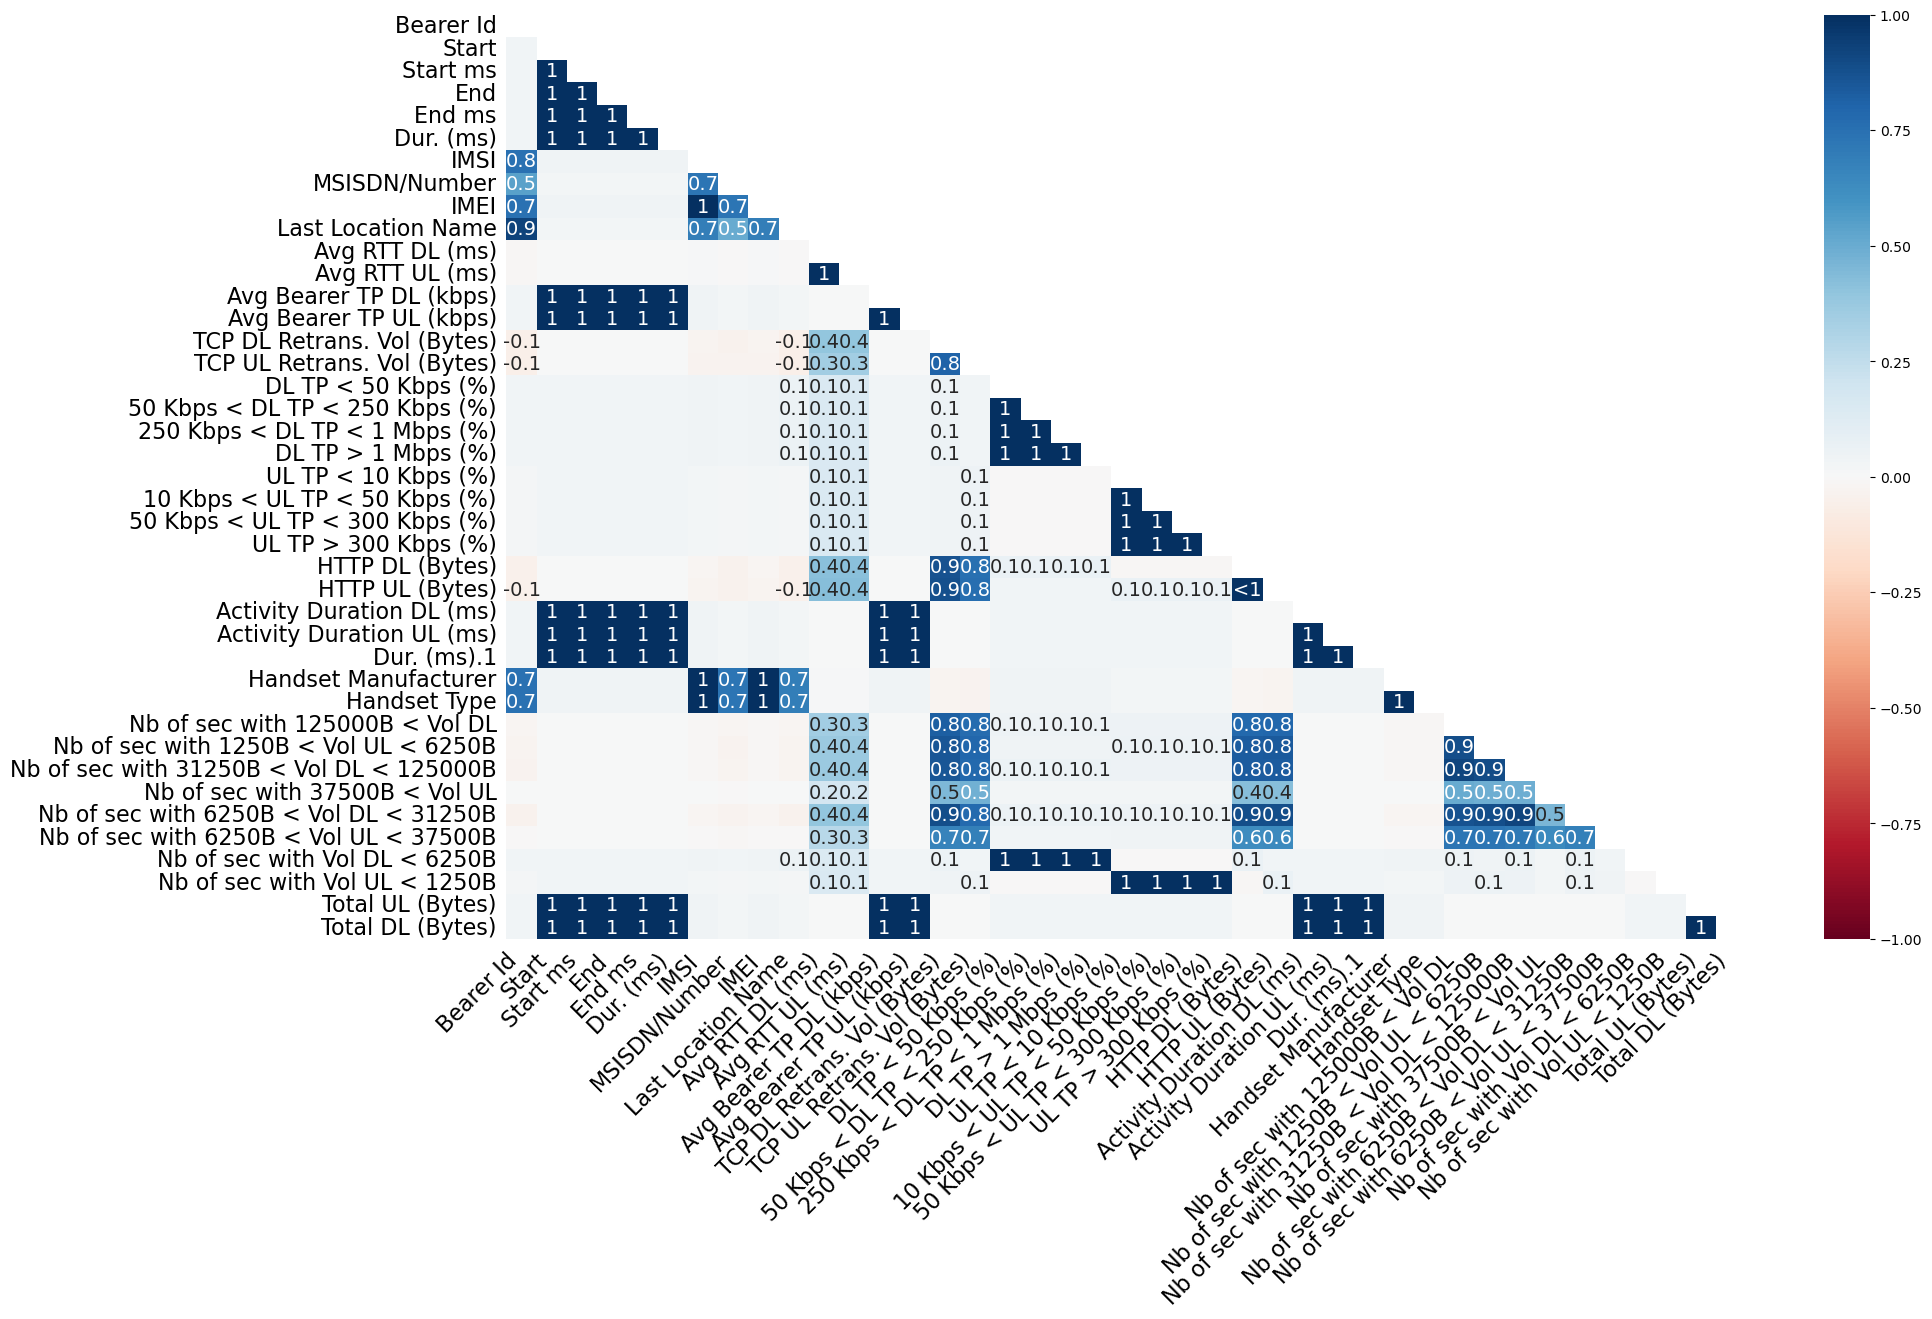

In [38]:
msno.heatmap(df)

<Axes: >

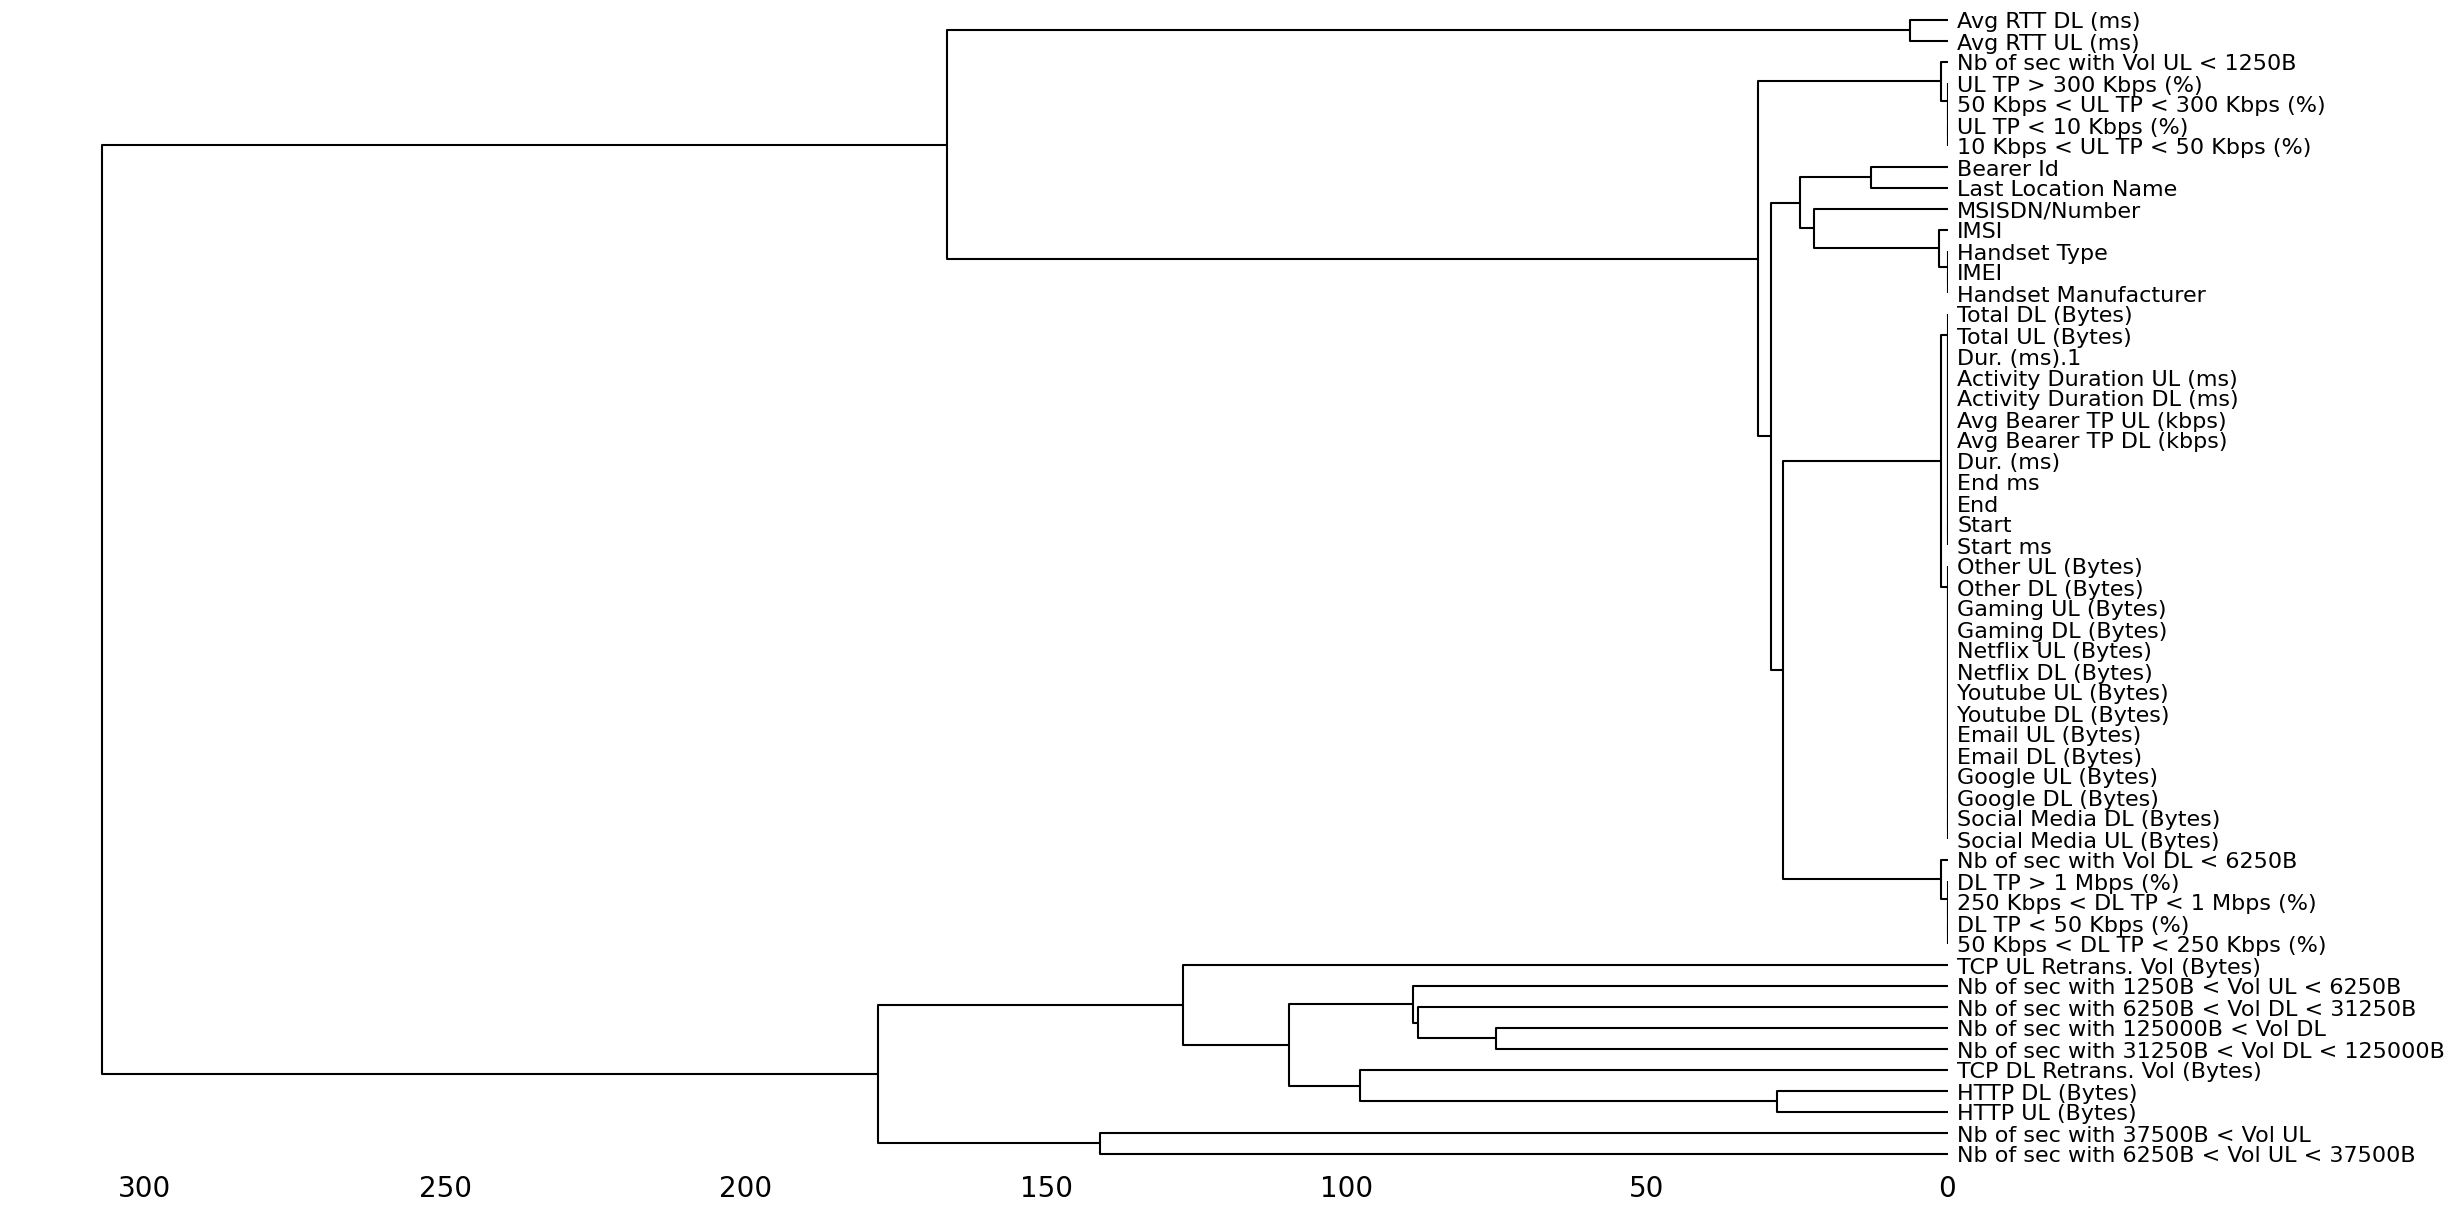

In [9]:
msno.dendrogram(df)

In [43]:
def percent_missing(df):
    totalCells = df.size  # Total number of cells in the DataFrame
    missingCount = df.isnull().sum().sum()  # Total number of missing cells
    totalMissing = df.isnull().sum()  # Total number of missing values in each column
    
    return totalCells, missingCount, totalMissing
totalCells, missingCount, totalMissing = percent_missing(df)
print("The Telcom dataset contains", round(
    ((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The Telcom dataset contains Bearer Id                                   0.01
Start                                       0.00
Start ms                                    0.00
End                                         0.00
End ms                                      0.00
Dur. (ms)                                   0.00
IMSI                                        0.01
MSISDN/Number                               0.01
IMEI                                        0.01
Last Location Name                          0.01
Avg RTT DL (ms)                             0.34
Avg RTT UL (ms)                             0.34
Avg Bearer TP DL (kbps)                     0.00
Avg Bearer TP UL (kbps)                     0.00
TCP DL Retrans. Vol (Bytes)                 1.07
TCP UL Retrans. Vol (Bytes)                 1.17
DL TP < 50 Kbps (%)                         0.01
50 Kbps < DL TP < 250 Kbps (%)              0.01
250 Kbps < DL TP < 1 Mbps (%)               0.01
DL TP > 1 Mbps (%)                       

From the above graph we can observe that there are a lot of missing values. In total there are 64 % are missed.

# skewness
we cannot calculate skewness for six column as they are in string or datetime format

In [45]:
import pandas as pd
import numpy as np
import logging

class MissingInformation:
    def __init__(self,df:pd.DataFrame):
        self.df = df
        logging.basicConfig(filename='../logfile.log', filemode='a',
                            encoding='utf-8', level=logging.DEBUG)
        
    def missing_values_table(self,df:pd.DataFrame)->pd.DataFrame:
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # dtype of missing values
        mis_val_dtype = df.dtypes

        # Make a table with the results
        mis_val_table = pd.concat(
            [mis_val, mis_val_percent, mis_val_dtype], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
            columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

        # Print some summary information
     
        logging.info("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                         "There are " + str(mis_val_table_ren_columns.shape[0]) +
                         " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

    def percent_missing(self,df:pd.DataFrame):

        # Calculate total number of cells in dataframe
        totalCells = np.product(df.shape)

        # Count number of missing values per column
        missingCount = df.isnull().sum()

        # Calculate total number of missing values
        totalMissing = missingCount.sum()

        return totalCells, missingCount, totalMissing

In [46]:
import logging
import pandas as pd
import numpy as np

import logging
import re
class DataFrameInformation:
    
    def __init__(self,data:pd.DataFrame):
        self.data = data
        logging.basicConfig(filename='../logfile.log', filemode='a',
                            encoding='utf-8', level=logging.DEBUG)
        
    #calculate the skewness of the dataframe first
    def get_skewness(self,data:pd.DataFrame):
        skewness = data.skew(axis=0, skipna=True)
        df_skewness = pd.DataFrame(skewness)
        df_skewness = df_skewness.rename(
            columns={0: 'skewness'})
        
        return df_skewness

    #calculate skewness and missing value table
    def get_skewness_missing_count(self,data:pd.DataFrame):
        df_skewness = self.get_skewness(data)
        minfo = MissingInformation(data)
        
        mis_val_table_ren_columns = minfo.missing_values_table(data)
        df1 = pd.concat([df_skewness, mis_val_table_ren_columns], axis=1)
        df1['Dtype'] = df1['Dtype'].fillna('float64')
        df1['% of Total Values'] = df1['% of Total Values'].fillna(0.0)
        df1['Missing Values'] = df1['Missing Values'].fillna(0)
        df1 = df1.sort_values(by='Missing Values', ascending=False)
        return df1

    def get_column_with_string(self,df: pd.DataFrame, text):
        return [col for col in df.columns if re.findall(text, col) != []]

    def get_dataframe_information(self,df: pd.DataFrame):
        columns = []
        counts = []
        i = 0

        for key, item in df.isnull().sum().items():
            if item != 0:
                columns.append(key)
                counts.append(item)
                i += 1
        logging.info(
            'the dataset contain {} columns with missing values'.format(i))
        return pd.DataFrame({'column name': columns, 'counts': counts})

<Axes: >

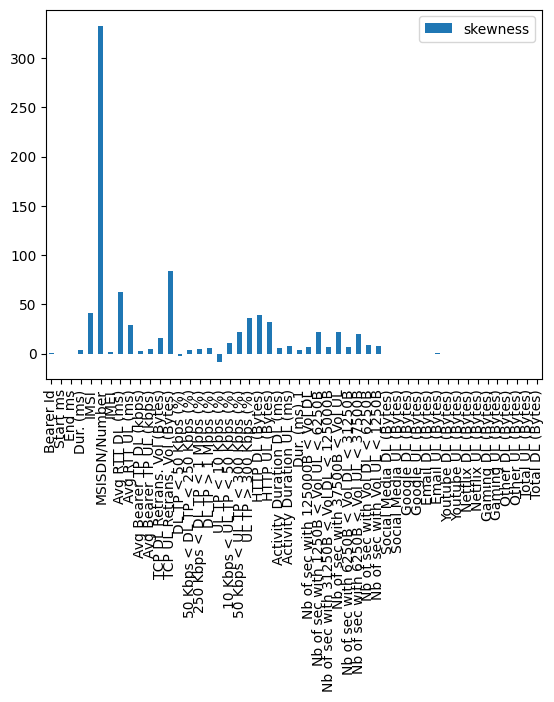

In [12]:
# Exclude non-numeric columns and calculate skewness
import numpy as np
numeric_columns = df.select_dtypes(include=np.number)
skewness = numeric_columns.skew(axis=0, skipna=True)

# Create DataFrame to store skewness values
df_skewness = pd.DataFrame({'skewness': skewness})
df_skewness
df_skewness.plot(kind='bar')

<AxesSubplot:ylabel='Density'>

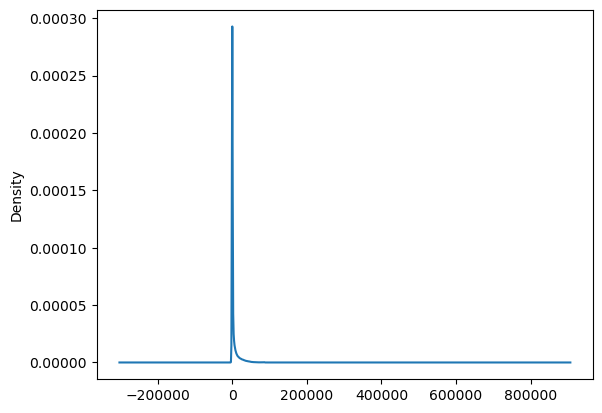

In [48]:
df['Nb of sec with Vol UL < 1250B'].plot(kind='kde')
# MSISDN/Number

# Cleaning Data

#using mean median and mode

In [49]:
from scipy.stats.mstats import winsorize
class CleanData:
    def __init__(self,df:pd.DataFrame):
        self.df = df
        logging.basicConfig(filename='../logfile.log', filemode='a',
                            encoding='utf-8', level=logging.DEBUG)
    
    def convert_dtype(self, df: pd.DataFrame, columns, dtype):
        for col in columns:
            df[col] = df[col].astype(dtype=dtype)
        return df
    
    def format_float(self,value):
        return f'{value:,.2f}'

    def convert_bytes_to_megabytes(self, df:pd.DataFrame, columns):

        megabyte = 1*10e+5
        for col in columns:
            df[col] = df[col] / megabyte
        return df
    
    def convert_ms_to_sec(self, df:pd.DataFrame, columns): 
        s = 10e+3
        for col in columns:
            df[col] = df[col] / s
        return df 
    
    def fix_missing_ffill(self, df: pd.DataFrame,col):
        df[col] = df[col].fillna(method='ffill')
        return df[col]
  
    def fix_missing_bfill(self, df: pd.DataFrame, col):
        df[col] = df[col].fillna(method='bfill')
        return df[col]
    
    def drop_column(self, df: pd.DataFrame, columns) -> pd.DataFrame:
        for col in columns:
            df = df.drop([col], axis=1)
        return df

    def drop_missing_count_greaterthan_20p(self,data:pd.DataFrame):
        data_info = DataFrameInformation(data)
        df = data_info.get_skewness_missing_count(data)
        not_fill = df[(df['% of Total Values'] >= 20.0)].index.tolist()
        df_clean = self.drop_column(data, not_fill)
         
        return df_clean
    
    def fill_mode(self, df: pd.DataFrame, columns) -> pd.DataFrame:
        for col in columns:
            df[col] = df[col].fillna(df[col].mode()[0])
        return df

    def fix_outlier(self,df:pd.DataFrame, columns):
        for column in columns:
            df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(), df[column])
            
        return df

    def handle_outliers(self, df: pd.DataFrame,lower,upper):
       
        selected_columns = df.select_dtypes(include='float64').columns
        for col in selected_columns:
            df[col] = winsorize(df[col], (lower, upper))
        return df

In [50]:
df_clean = df.copy()
data_cleaner = CleanData(df_clean)

In [51]:
# the missing values in End and start column is only 1. we can replace it with bfill or ffill
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')

NameError: name 'fix_missing_ffill' is not defined

In [35]:
# fill  Handset Manufacturer, Handset Type, and last location name

df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(
    df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(
    df_clean['Handset Type'].mode()[0])
df_clean['Last Location Name'] = df_clean['Last Location Name'].fillna(
    df_clean['Last Location Name'].mode()[0])

In [36]:
#get columns with % of missing value > 30

drop_column = mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values']>15].index
print(drop_column.tolist())

['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)', 'HTTP UL (Bytes)', 'HTTP DL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']


In [37]:
df_clean = df.drop(drop_column.tolist(),axis=1)
df_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [38]:
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_bfill(
    df_clean, 'Nb of sec with Vol DL < 6250B')

all the column with missing values with precent of less than 20 and greater than 0.4 are replaced with mode as they are skewed. however for the 'MSISDN/Number','IMEI' and 'MSI' we cannot do that because it should be unique, there should be no duplicate

In [43]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns based on conditions related to missing value percentage
fill_mode = missing_percentage[(missing_percentage < 20.0) & (missing_percentage >= 0.4)].index.tolist()
not_fill_mode = ['IMEI', 'IMSI', 'MSISDN/Number']

fill_mode_columns = [x for x in fill_mode if x not in not_fill_mode]



In [46]:
# Check if columns in fill_mode_columns exist in df_clean
columns_to_fill = [col for col in fill_mode_columns if col in df_clean.columns]

# Fill missing values in the selected columns
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(df_clean[columns_to_fill].mode().iloc[0])

# Alternatively, you can use the fillna method with a specific value:
# df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(some_value)

# Check the result
print(df_clean[columns_to_fill].isnull().sum())  # Ensure no missing values remain in these columns

Bearer Id                         0
Last Location Name                0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
dtype: int64


In [48]:
def cap_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

In [47]:
missing_info = MissingInformation(df_clean)
mis_val_table_after_clean = missing_info.missing_values_table(df_clean)
mis_val_table_after_clean

,Missing Values,% of Total Values,Dtype
MSISDN/Number,1066,0.7,float64
Handset Type,572,0.4,object
Handset Manufacturer,572,0.4,object
IMEI,572,0.4,float64
IMSI,570,0.4,float64
Start,1,0.0,object
Activity Duration DL (ms),1,0.0,float64
Total UL (Bytes),1,0.0,float64
Dur. (ms).1,1,0.0,float64
Activity Duration UL (ms),1,0.0,float64


In [51]:
df_clean.dropna(inplace=True)
mis_val_table_after_clean = missing_info.missing_values_table(df_clean)
mis_val_table_after_clean

,Missing Values,% of Total Values,Dtype


In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148935 entries, 0 to 149999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148935 non-null  float64
 1   Start                           148935 non-null  object 
 2   Start ms                        148935 non-null  float64
 3   End                             148935 non-null  object 
 4   End ms                          148935 non-null  float64
 5   Dur. (ms)                       148935 non-null  float64
 6   IMSI                            148935 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            148935 non-null  float64
 9   Last Location Name              148935 non-null  object 
 10  Avg Bearer TP DL (kbps)         148935 non-null  float64
 11  Avg Bearer TP UL (kbps)         148935 non-null  float64
 12  DL TP < 50 Kbps (%)  